# Prediction using Decision Tree algorithm - Iris dataset [Task #6]

# Importing libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading dataset

In [151]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [152]:
df = df.drop('Id', axis =1)

In [153]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
df.shape

(150, 5)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [156]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [157]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Since 3 classes in the target column are equally present, it is a balanced dataset

In [158]:
x = df.iloc[:, 0:-1].values
y = df.iloc[:,-1].values
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

# Visualising sepal and petal dimensions

In [124]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

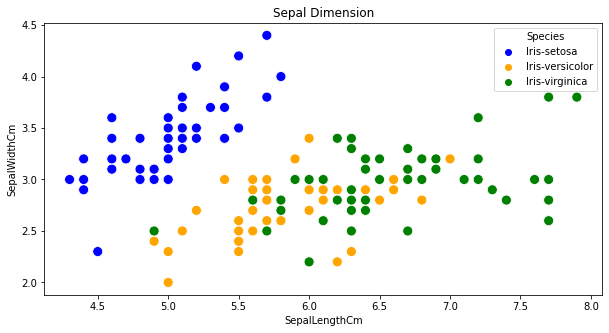

In [159]:
plt.figure(figsize = (10,5))
plt.title("Sepal Dimension")
sns.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],hue=df['Species'],palette=["blue","orange","green"],s=100);

This plot gives the information of the species 'Iris-setosa' has small sepal length and large sepal width whereas species 'Iris-virginica' has large sepal length and small sepal width.

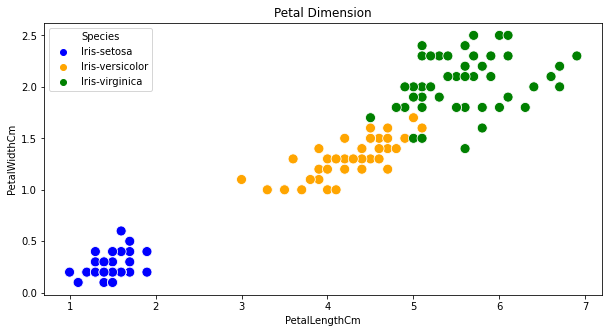

In [160]:
plt.figure(figsize = (10,5))
plt.title("Petal Dimension")
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'],palette=["blue","orange","green"],s=100);

Here, the species 'Iris-setosa' has small petal length and large petal width whereas species 'Iris-virginica' holds the opposite. There is a linear relationship between petal length and width for all species.

# Analysing the distribution of sepal and petal dimension

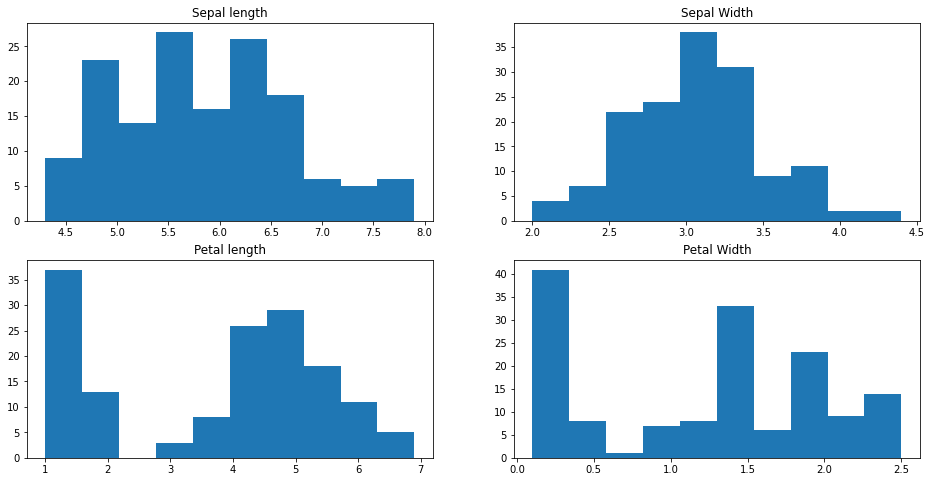

In [161]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))

axes[0,0].set_title('Sepal length')
axes[0,0].hist(df['SepalLengthCm']);

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm']);

axes[1,0].set_title("Petal length")
axes[1,0].hist(df['PetalLengthCm']);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm']);

# Correlation between feature and Target

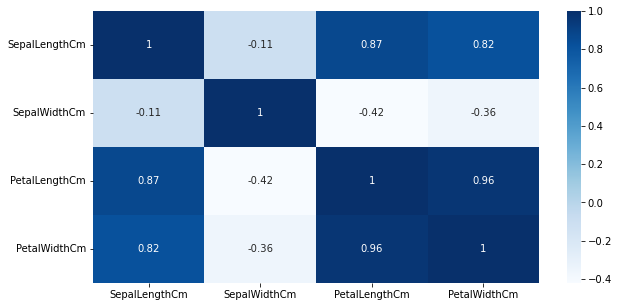

In [162]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True, cmap = 'Blues');

Petal length and petal width are highly correlated whereas Sepal length and sepal width are not.

In [163]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x,y)

DecisionTreeClassifier()

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size = 0.3)

In [165]:
SpeciesTree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
SpeciesTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [166]:
SpeciesTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Prediction

In [167]:
predTree = SpeciesTree.predict(X_test)

In [168]:
print(predTree[0:5])
print(y_test[0:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


Predicted output and the actual output is same

# Accuracy

In [169]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, predTree))

Accuracy:  0.9777777777777777


# Decision tree visualization

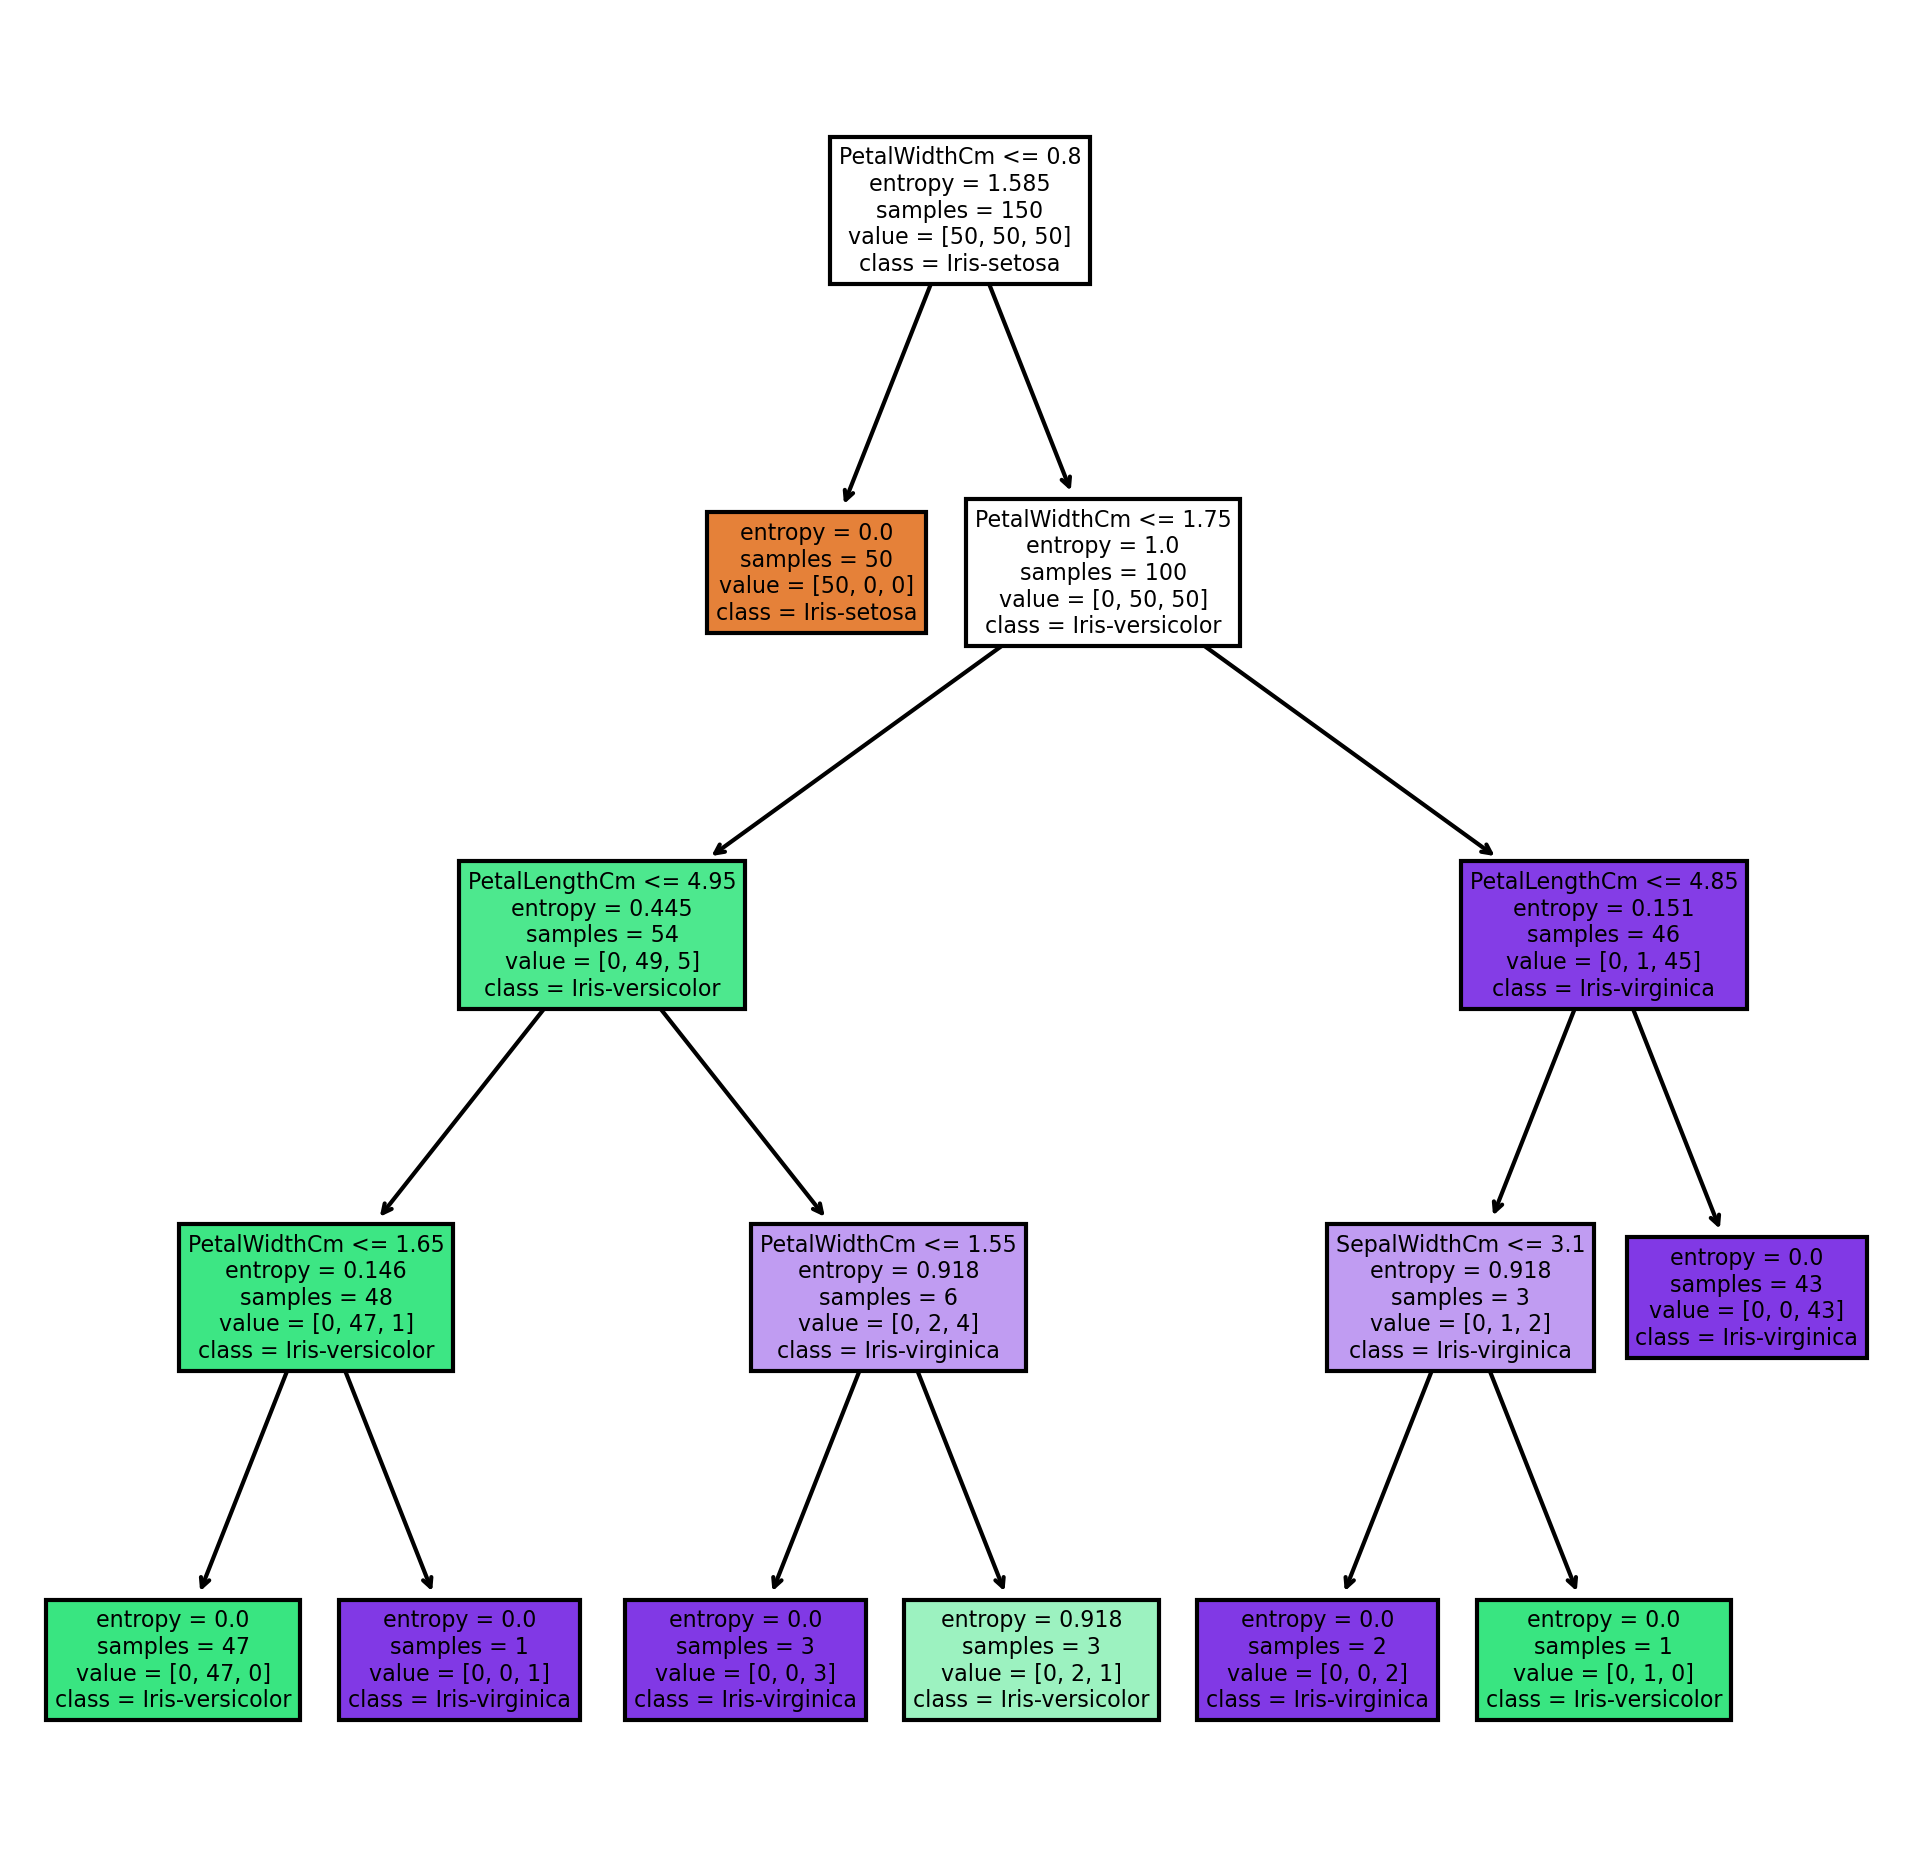

In [173]:
from sklearn import tree
f = df.columns[0:5]
c = df['Species'].unique().tolist()
SpeciesTree.fit(x,y)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8),dpi=300)

tree.plot_tree(SpeciesTree, feature_names =f, class_names= c, filled=True);

# Prediction for random test instance

In [174]:
a=7
print("Predicted output for {} instance: {} ".format(a,predTree[7]))

Predicted output for 7 instance: Iris-versicolor 


# Prediction of species for set of values

In [175]:
x_new = [[6.3,3.0,1.3,0.2]]
pred_Tree = SpeciesTree.predict(x_new)
pred_Tree

array(['Iris-setosa'], dtype=object)

Since the petal width is 0.2 which is less than 0.8 here, it is classified as "Iris-setosa"